# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 2

Do wykonania zadań proszę zapoznać się z metodami, właściwościami, oraz funkcjami:
`__repr__`, `__str__`, `__add__`, `__sub__`, `__eq__`, `__lt__`, `__gt__`, `__le__`, `__ge__`, `__ne__`, `__hash__`, `__truediv__`, `__mul__`, `__class__`, `__name__`, `id`.

Operatory: https://docs.python.org/3/library/operator.html


**UWAGA**: W ninejszym laboratorium proszę nie korzystać z zewnętrzych modułów/bibliotek (poza biblioteką _matplotlib_).

**UWAGA 2**: Obsługę błędów należy zrealizować w postaci wyjątków.

### Zadanie 1

Napisz klasę `Vector` udostępniającą funkcjonalność:
- reprezentuje wektor dowolnej długości,
- obiekt inicjowany listą (np. `Vector([1, 2, 3])`,
- posiada funkcję zwracającą moduł wektora,
- umożliwia dodawanie (`+`) i odejmowanie (`-`) wektorów. Dodaj obsługę błędów (różna długość (liczba elementów) wektora),
- możliwość wyświetlenia wektora jako listy za pomocą funkcji `print(v)` (metoda `__str__`),
- uruchomienie komórki zawierającej jedynie nazwę zmiennej (typu `Vector`) spowoduje wyświetlenie nazwy typu `Vector`, adresu zmiennej w pamięci (funkcja `id`) oraz jej zawartości, np. `<Vector([1, 2, 3]) at 140185630442880>` (metoda `__repr__`)

In [63]:
import math
import matplotlib.pyplot as plt

class Vector():
    def __init__(self, coordinates):
        self.cordinates = coordinates

    def get_module(self):
        return math.sqrt(sum([pow(i, 2) for i in self.cordinates]))
    
    def __str__(self):
        return str(self.cordinates)
    
    def __add__(self, vector2):
        if len(self.cordinates) == len(vector2.cordinates):
            return [i + j for i,j in zip(self.cordinates, vector2.cordinates)]
        else:
            print('Different sizes')
        #result = list(map(operator.add, self.cordinates, vector2.cordinates))

    def __sub__(self, vector2):
        if len(self.cordinates) == len(vector2.cordinates):
            return [i - j for i,j in zip(self.cordinates, vector2.cordinates)]
        else:
            print('Different sizes')

    def __repr__(self):
        return f'<Vector({self.cordinates}) at {id(self)}>'
    
    def __gt__(self, vector):
        return [True if i>j else False for i, j in zip(self.cordinates, vector.cordinates)]
    


    def plot_vector(self):
        if len(self.cordinates) == 2:
            fig, ax = plt.subplots()
            ax.quiver(0, 0, self.cordinates[0], self.cordinates[1], angles='xy', scale_units='xy', scale=1, color='r')
            ax.set_xlim([0, 2*self.cordinates[0]])
            ax.set_ylim([0, 2*self.cordinates[1]])
            plt.grid()
            plt.show()
        else:
            print('Wrong dimesnion')

    def __hash__(self):
        return hash(self.get_module())
    
    def __eq__(self, other):
        if isinstance(other, Vector):
            return self.get_module() == other.get_module()
        return False
    
    def __mul__(self, other):
        if isinstance(other, int):
            return [x*other for x in self.cordinates]
        else:
            raise TypeError



    def __truediv__(self, other):
        if isinstance(other, int):
            if other != 0:
                return [x/other for x in self.cordinates]
            else:
                raise ZeroDivisionError
        else:
            raise TypeError


In [64]:
vector1 = Vector([1, 2, 3])
vector3 = Vector([1, 2])
vector2 = Vector([3, 2, 1])
print(vector1.get_module())
print(vector1 + vector2)
print(vector1 - vector2)
print(vector1)
vector1

3.7416573867739413
[4, 4, 4]
[-2, 0, 2]
[1, 2, 3]


<Vector([1, 2, 3]) at 2846702102608>

### Zadanie 2

Do wcześniej zaimplementowanej klasy dopisz funkcje pozwalające na porównanie wektorów (ich modułów) za pomocą operatorów: `==`, `>=`, `<=`, `>`, `<`, `!=`. Porównanie ma zostać wykonane na poziomie elementów wektorów (_element wise_), poniżej przykład:

```ipython
 In [1]: a = Vector([1, 2, 3]) \
    ...: b = Vector([3, 2, 1]) \
    ...: a <= b
Out [1]: <Vector([True, True, False]) at 140185575662832>
```

In [65]:
vector1 > vector2

[False, False, True]

### Zadanie 3

Napisz funkcję umożliwiającą wyświetlenie wektora (`Vector`) zaczepionego w punkcie (0,0) na wykresie (zaimplementuj wyświetlanie za pomocą biblioteki `matplotlib`. 

> **UWAGA**: Funkcja powinna działać tylko dla wektora o dwóch wymiarach (dwuelementowa lista) - wykres 2D i wyświetlać komunikat jeżeli wymiar jest inny.

> Podpowiedź: możesz wykorzystać funkcję [matplotlib.pyplot.arrow](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.arrow.html)

Wrong dimesnion


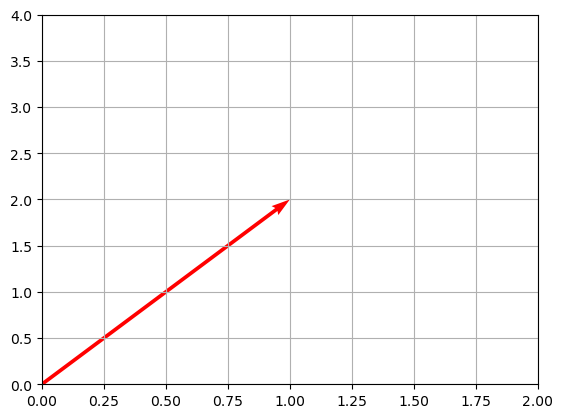

In [66]:
vector1.plot_vector()
vector3.plot_vector()

### Zadanie 4

Dodaj możliwość zastosowania obiektu klasy `Vector` jako klucza w słowniku. Np.:

```python
d = {
    Vector([1, 2, 3]): 'Wektor 1',
    Vector([2, 2, 3]): 'Wektor 2'
}
d[Vector([2, 2, 3])]
```

In [67]:
dictionary = {
    Vector([1,2,3]): 'Wektor 1',
    Vector([2,2,3]): 'Wektor 2'
}
dictionary[Vector([1,2,3])]

'Wektor 1'

### Zadanie 5

Dodaj funkcjonalność:
- dzielenia przez skalar (np. `Vector([2, 4]) / 2`),
- mnożenia przez skalar (np. `Vector([2, 4]) * 2`).

> Podpowiedź: Pamiętaj o obsłudze błędów.

In [71]:
result = vector1 / 2
print(result)

[0.5, 1.0, 1.5]
